In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score, precision_score, confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [3]:
remove_features = ['person','time','amount', 'offer_id', 'time_received', 'time_viewed', 'mobile', 'email', 'social', 'web','converted','delta_time_reception_viewed','prev_person',
       'delta_time_viewed_completion','gender','O','time_completed', 'reward', 'potential_reward', 'duration','offer_type', 'difficulty','is_transaction', ]
kept_features = [ 'person',
       'age', 'income', 'F', 'M', 'member_since_month','viewed',  'is_completed',
       'count_offers_completed', 'count_offers_viewed', 'count_transactions','avg_spending', 'avg_reward',  'delta_time_reception_viewed_avg',
       'delta_time_viewed_completion_avg', 'bogo','discount', 'informational']

In [5]:
data_dir = './data'

In [6]:
features = pd.read_csv(os.path.join(data_dir, 'features.csv'),index_col=0)

In [7]:
df = features[features.bogo.isnull()==False].copy()
df.replace([np.inf, -np.inf], np.nan,inplace=True)
df = df[kept_features]

remove columns not wanted

In [8]:
df = df.drop(['person','discount','informational','is_completed'],axis=1)

In [9]:
demographic = ['age','income','F','M','member_since_month','bogo']
df = df[demographic].copy()
#df_demo

In [10]:
df.dropna(inplace=True)

In [11]:
df.columns

Index(['age', 'income', 'F', 'M', 'member_since_month', 'bogo'], dtype='object')

In [12]:
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df))

In [13]:
df_y = scaled.iloc[:,-1:]
df_X = scaled.iloc[:,:-1]
print('length of df_y: {}, \nlength of df_X: {}'.format(len(df_y),len(df_X)))
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)
print('train: {},\ntest: {}'.format(len(y_train),len(y_test)))

length of df_y: 19763, 
length of df_X: 19763
train: 13834,
test: 5929


In [14]:
lm = linear_model.LogisticRegression()
lm.fit(X_train.values,y_train.values.squeeze())
y_pred = lm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1602 1115]
 [ 941 2271]]
              precision    recall  f1-score   support

         0.0       0.63      0.59      0.61      2717
         1.0       0.67      0.71      0.69      3212

    accuracy                           0.65      5929
   macro avg       0.65      0.65      0.65      5929
weighted avg       0.65      0.65      0.65      5929



In [15]:
for kernel in ['rbf', 'poly']:
    for gamma in [0.1, 1, 5]:
        print(kernel)
        svm = SVC(kernel=kernel, gamma=gamma)
        svm.fit(X_train.values,y_train.values.squeeze())
        y_pred = svm.predict(X_test)
        print(confusion_matrix(y_test,y_pred))
        print(classification_report(y_test,y_pred))

rbf
[[1452 1265]
 [ 734 2478]]
              precision    recall  f1-score   support

         0.0       0.66      0.53      0.59      2717
         1.0       0.66      0.77      0.71      3212

    accuracy                           0.66      5929
   macro avg       0.66      0.65      0.65      5929
weighted avg       0.66      0.66      0.66      5929

rbf
[[1755  962]
 [ 852 2360]]
              precision    recall  f1-score   support

         0.0       0.67      0.65      0.66      2717
         1.0       0.71      0.73      0.72      3212

    accuracy                           0.69      5929
   macro avg       0.69      0.69      0.69      5929
weighted avg       0.69      0.69      0.69      5929

rbf
[[1858  859]
 [ 897 2315]]
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.68      2717
         1.0       0.73      0.72      0.73      3212

    accuracy                           0.70      5929
   macro avg       0.70      0.70  

In [16]:
sgdc = SGDClassifier()
sgdc.fit(X_train.values,y_train.values.squeeze())
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1716 1001]
 [ 805 2407]]
              precision    recall  f1-score   support

         0.0       0.68      0.63      0.66      2717
         1.0       0.71      0.75      0.73      3212

    accuracy                           0.70      5929
   macro avg       0.69      0.69      0.69      5929
weighted avg       0.69      0.70      0.69      5929



In [17]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=19)
forest.fit(X_train.values,y_train.values.squeeze())
y_pred = forest.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1813  904]
 [ 910 2302]]
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67      2717
         1.0       0.72      0.72      0.72      3212

    accuracy                           0.69      5929
   macro avg       0.69      0.69      0.69      5929
weighted avg       0.69      0.69      0.69      5929



In [18]:
from xgboost import XGBClassifier
for gamma in [6]:
    xgb = XGBClassifier(gamma=gamma)
    xgb.fit(X_train.values,y_train.values.squeeze())
    y_pred = xgb.predict(X_test.values)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

[[1951  766]
 [ 942 2270]]
              precision    recall  f1-score   support

         0.0       0.67      0.72      0.70      2717
         1.0       0.75      0.71      0.73      3212

    accuracy                           0.71      5929
   macro avg       0.71      0.71      0.71      5929
weighted avg       0.71      0.71      0.71      5929



In [363]:
# The coefficients
print('Coefficients: \n', lm.coef_, lm.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[ 0.41438268  1.08747084 -0.52630396 -0.63263727 -0.57463586  0.
   1.06949119 -0.11048796 -0.40199582  0.29641008  0.73761866 -0.52462485]] [0.38294705]
Mean squared error: 0.33
Coefficient of determination: -0.37


<AxesSubplot:>

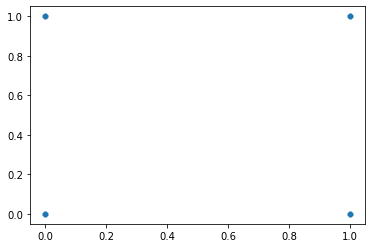

In [355]:
sns.scatterplot(x=y_test.values.squeeze(),y=y_pred.squeeze(),alpha=.1)